In [191]:
import pandas as pd

In [192]:
train = pd.read_csv('titanic/train.csv')

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
#sibsp  - 배우자 / 혈연가족 등의 수 
# prach 부모님 + 아이들 수 

In [101]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# 결측치 처리 : fillna

In [7]:
# survived를 맞춰야 함. 
# 0 / 1 분류 (classification)
# 회귀 (regression) -> 실수 등의 값을 도출

In [8]:
train['Survived'].value_counts() #0이 죽은 사람

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train[(train['Pclass'] == 3) & (train['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [11]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
gender_map = {'male' : 0, 'female' : 1}

In [13]:
train['Sex1'] = train['Sex'].map(gender_map)

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [15]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [16]:
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
train.groupby('SibSp')['Survived'].mean().sort_values(ascending = False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [18]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
train.groupby('Parch')['Survived'].mean().sort_values(ascending = False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

In [20]:
train.groupby(['Pclass','Sex'])['Survived'].mean().sort_values(ascending = False)

Pclass  Sex   
1       female    0.968085
2       female    0.921053
3       female    0.500000
1       male      0.368852
2       male      0.157407
3       male      0.135447
Name: Survived, dtype: float64

In [21]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [22]:
train.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [23]:
train.groupby(['Pclass', 'Sex'])[['Survived', 'Fare']].mean()

Survived        Fare
Pclass Sex                         
1      female  0.968085  106.125798
       male    0.368852   67.226127
2      female  0.921053   21.970121
       male    0.157407   19.741782
3      female  0.500000   16.118810
       male    0.135447   12.661633

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex1         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex1             0
dtype: int64

In [26]:
# 중앙값 / 남자 여자 평균 구하기 

In [32]:
train.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [33]:
train2 = train.copy()

In [36]:
train[['Sex', 'Age']][:3]

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0


In [37]:
train.groupby('Sex')['Age'].transform('median')

0      29.0
1      27.0
2      27.0
3      27.0
4      29.0
       ... 
886    29.0
887    27.0
888    27.0
889    29.0
890    29.0
Name: Age, Length: 891, dtype: float64

In [42]:
train2['Age'][-5:]

886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, dtype: float64

In [43]:
train2['Age'].fillna(train2.groupby('Sex')['Age'].transform('median'))[-5:]

886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [44]:
train2['Age'].fillna(train2.groupby('Sex')['Age'].transform('median'), inplace=True)

In [45]:
train2['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    27.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [46]:
train2['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Title'] = ['Mr.', 'Mrs.']

In [50]:
train[(train['Name'].str.lower()).str.contains(('Mr.').lower())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [51]:
train[(train['Name'].str.lower()).str.contains(('Mrs.').lower())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1


In [52]:
train[(train['Name'].str.lower()).str.contains(('Miss.').lower())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,1
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1


In [54]:
train['Name'].str.extract('[0-9]')

ValueError: pattern contains no capture groups

In [57]:
train['Name'].str.extract('([a-zA-Z])+,')

,0
0,d
1,s
2,n
3,e
4,n
...,...
886,a
887,m
888,n
889,r


In [64]:
train['Name'].str.extract('([a-zA-Z]+),')

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [194]:
train['Title']= train['Name'].str.extract('([a-zA-Z]+)\.')

In [69]:
# 정규표현식에 사용되는 메타문자들을 추출하고 싶다면 그 앞에 \를 붙여야 한다...

In [72]:
train['Name'].str.extract('[(]([a-zA-Z ]*)[)]')

,0
0,NaN
1,Florence Briggs Thayer
2,NaN
3,Lily May Peel
4,NaN
...,...
886,NaN
887,NaN
888,NaN
889,NaN


In [140]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
name_map = {'Mr' :0, 'Miss' :1, 'Mrs' : 2, 'Other' : 3}

In [76]:
name_list = ['Mr', 'Miss', 'Mrs', 'Other']

In [80]:
for i, j in enumerate(['Mr', 'Miss', 'Mrs', 'Other']):
    print(i,j)

0 Mr
1 Miss
2 Mrs
3 Other


In [81]:
name_mapping = {}

for i,j in enumerate(['Mr', 'Miss', 'Mrs', 'Other']):
    name_mapping[j] = i

In [82]:
name_mapping

{'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Other': 3}

In [86]:
train['Title1'] = train['Title'].map(name_mapping)

In [90]:
train['Title1']= train['Title1'].fillna(3)

In [91]:
train['Title1'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     67
Name: Title1, dtype: int64

In [95]:
train['Title2'] = train['Title'].copy()

In [96]:
train['Title2'].unique()

array([0., 2., 1., 3.])

In [199]:
train['Title1'] = train['Title'].copy()

In [200]:
train['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [127]:
title_map = {}

for value, key in enumerate(train['Title1'].unique()):
    if value >= 3:
        title_map[key] = 3
    else:
        title_map[key] =value

In [201]:
train['Title1']= train['Title1'].str.lower()

In [202]:
title_map1 = {}

for title in train['Title1'].unique():
    if title == 'mr' :
        title_map1[title] = 0
    elif title == 'mrs' :
        title_map1[title] = 1
    elif title == 'miss' :
        title_map1[title] = 2
    else:
        title_map1[title] = 3

In [203]:
title_map1

{'mr': 0,
 'mrs': 1,
 'miss': 2,
 'master': 3,
 'don': 3,
 'rev': 3,
 'dr': 3,
 'mme': 3,
 'ms': 3,
 'major': 3,
 'lady': 3,
 'sir': 3,
 'mlle': 3,
 'col': 3,
 'capt': 3,
 'countess': 3,
 'jonkheer': 3}

In [204]:
train['Title2'] = train['Title1'].map(title_map1)

In [205]:
train['Title2'].value_counts()

0    517
2    182
1    125
3     67
Name: Title2, dtype: int64

In [298]:
import numpy as np

In [299]:
train['Title'] = np.where(train['Title'] == 'mr', 0,
                          np.where(train['Title'] == 'mrs', 1,
                                   np.where(train['Title'] == 'miss', 2, 3)))

In [ ]:
def name_mapping(title):
    if title in train['Title1'].unique():
        return 0
    

In [154]:
train.groupby('Title2')['Age'].median()

Title2
0    30.0
1    35.0
2    21.0
3     9.0
Name: Age, dtype: float64

In [206]:
train['Age1']= train['Age'].fillna(train.groupby('Title2')['Age'].transform('median'))

In [207]:
train['Age1'].isnull().sum()

0

In [208]:
train['Age1'].mean()

29.372805836139168

In [209]:
train['Age1'].median()

30.0

In [210]:
import seaborn as sns

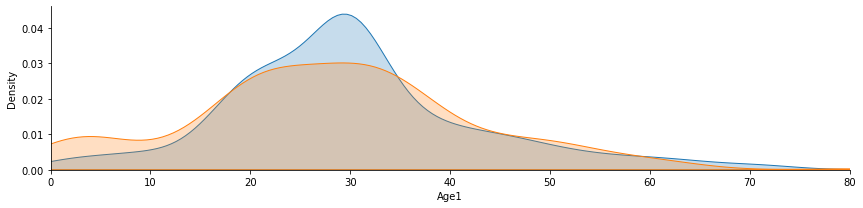

In [167]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age1', shade = True)
facet.set(xlim = (0, train['Age1'].max()))

child(~16) :0
young(17~26) :1
adult(27~36) :2 
mid age(37~62) :3
senior(63~) :4

In [ ]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age1', shade = True)
facet.set(xlim = (0, train['Age1'].max()))

In [211]:
train.loc[train['Age1']<=16, 'Age2'] = 0
train.loc[(train['Age1'] > 16) & (train['Age1'] <= 26), 'Age2'] = 1
train.loc[(train['Age1'] > 26) & (train['Age1'] <= 36), 'Age2'] = 2
train.loc[(train['Age1'] > 37) & (train['Age1'] <=62), 'Age2'] = 3
train.loc[(train['Age1'] > 62), 'Age2'] = 4

In [212]:
train['Age2'].value_counts()

2.0    336
1.0    255
3.0    173
0.0    105
4.0     15
Name: Age2, dtype: int64

In [ ]:
# Age2 값 다시 구하기 

In [213]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [214]:
train.groupby(['Pclass', 'Embarked'])['Survived'].count()

Pclass  Embarked
1       C            85
        Q             2
        S           127
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: Survived, dtype: int64

In [215]:
train['Embarked'].fillna('S', inplace = True)

In [216]:
train['Embarked'].isnull().sum()

0

In [217]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [218]:
embarked_map = {}

for embarked in train['Embarked'].unique():
    if embarked == 'S':
        embarked_map[embarked] = 0
    elif embarked == 'C':
        embarked_map[embarked] = 1
    else:
        embarked_map[embarked] = 2

In [219]:
train['Embarked2'] = train['Embarked'].map({'S' : 0, 'C' :1, 'Q' :2})

In [220]:
train['Embarked2'].value_counts()

0    646
1    168
2     77
Name: Embarked2, dtype: int64

In [222]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [225]:
train[train['Pclass'] == 1]['Cabin'].str[0].unique()

array(['C', 'E', 'A', nan, 'B', 'D', 'T'], dtype=object)

In [226]:
train['Cabin'] = train['Cabin'].str[0]

In [227]:
train['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [228]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
Cabin_map = {}

for i in train['Cabin'].unique():
    

In [229]:
train['Cabin'].map({'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2.0, 'G':2.4, 'T':2.8})

0      NaN
1      0.8
2      NaN
3      0.8
4      NaN
      ... 
886    NaN
887    0.4
888    NaN
889    0.8
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [233]:
cabin_list = train['Cabin'].value_counts().index.values
cabin_list.sort()
cabin_list

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [234]:
cabin_mapping = {} 
for c, v in enumerate(cabin_list):
    cabin_mapping[v] = round(c*0.4,2) # 소수점 두 자리 
    

In [235]:
cabin_mapping

{'A': 0.0,
 'B': 0.4,
 'C': 0.8,
 'D': 1.2,
 'E': 1.6,
 'F': 2.0,
 'G': 2.4,
 'T': 2.8}

In [238]:
train['Cabin']= train['Cabin'].map(cabin_mapping)

In [239]:
train.groupby('Pclass')['Cabin'].median()

Pclass
1    0.8
2    1.8
3    2.0
Name: Cabin, dtype: float64

In [ ]:
train['Age1']= train['Age'].fillna(train.groupby
                                   ('Title2')['Age'].transform('median'))

In [303]:
train['Cabin']= train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'))

In [304]:
train['Cabin']

0      2.0
1      0.8
2      2.0
3      0.8
4      2.0
      ... 
886    1.8
887    0.4
888    2.0
889    0.8
890    2.0
Name: Cabin, Length: 891, dtype: float64

In [242]:
train['Cabin'].mean()

0.9568627450980391

In [243]:
train['Cabin'].median()

0.8

In [244]:
#male - 0 female 1 

train['Sex2'] = train['Sex'].map({'male':0 , 'female':1})

In [245]:
train['Sex2']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex2, Length: 891, dtype: int64

In [247]:
train.loc[train['Fare']<=17, 'Fare2'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare2'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare2'] = 2
train.loc[train['Fare'] > 100, 'Fare2'] = 3

In [248]:
train['Fare2']

0      0.0
1      2.0
2      0.0
3      2.0
4      0.0
      ... 
886    0.0
887    1.0
888    1.0
889    1.0
890    0.0
Name: Fare2, Length: 891, dtype: float64

In [260]:
train['FamilySize'] = train['SibSp'] + train['Parch'] +1

In [261]:
family_list=train['FamilySize'].value_counts().index.values
family_list.sort()
family_list

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11], dtype=int64)

In [269]:
family_mapping = {}

#for i, j in enumerate(family_list):
for value, key in enumerate(range(1,12)):
    family_mapping[key] = round(value * 0.4,1)

In [270]:
family_mapping

{1: 0.0,
 2: 0.4,
 3: 0.8,
 4: 1.2,
 5: 1.6,
 6: 2.0,
 7: 2.4,
 8: 2.8,
 9: 3.2,
 10: 3.6,
 11: 4.0}

In [271]:
train['FamilySize2'] = train['FamilySize'].map(family_mapping)

In [272]:
train['FamilySize2'].value_counts()

0.0    537
0.4    161
0.8    102
1.2     29
2.0     22
1.6     15
2.4     12
4.0      7
2.8      6
Name: FamilySize2, dtype: int64

In [275]:
train[['Survived', 'Pclass', 'Age2', 'Embarked2', 'Cabin', 'Sex2', 'Fare2', 'FamilySize2']]

,Survived,Pclass,Age2,Embarked2,Cabin,Sex2,Fare2,FamilySize2
0,0,3,1.0,0,NaN,0,0.0,0.4
1,1,1,3.0,1,0.8,1,2.0,0.4
2,1,3,1.0,0,NaN,1,0.0,0.0
3,1,1,2.0,0,0.8,1,2.0,0.4
4,0,3,2.0,0,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,0,2,2.0,0,NaN,0,0.0,0.0
887,1,1,1.0,0,0.4,1,1.0,0.0
888,0,3,1.0,0,NaN,1,1.0,1.2
889,1,1,1.0,1,0.8,0,1.0,0.0


---

In [290]:
test = pd.read_csv('titanic/test.csv')

In [291]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [292]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

In [293]:
test['Fare'].mean()

35.56084545454542

In [294]:
test['Fare'].median()

14.4542